In [1]:
from astropy.table import Table
from astropy.io import fits
from vtl.Readfile import Readfile
from astropy.cosmology import Planck13, z_at_value
from spec_id import Median_w_Error_cont
from glob import glob
import seaborn as sea
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
colors = [(0,i,i,i) for i in np.linspace(0,1,3)]
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.2, as_cmap=True)

In [26]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')
galDB = galDB.query('ids != 14713 and ids != 38126')
qgDB = pd.read_pickle('../data/good_spec_gal_DB.pkl')
# goodss = Table.read('/Users/Vince.ec/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/Eazy/goodss_3dhst.v4.1.zout',
#                    format = 'ascii')
# goodsn = Table.read('/Users/Vince.ec/catalogs_for_CLEAR/goodsn_3dhst.v4.1.cats/Eazy/goodsn_3dhst.v4.1.zout',
#                    format = 'ascii')
goodss = Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/Eazy/goodss_3dhst.v4.1.zout',
                   format = 'ascii')
goodsn = Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodsn_3dhst.v4.1.cats/Eazy/goodsn_3dhst.v4.1.zout',
                   format = 'ascii')

In [3]:
goodss['z_m1'][0]

0.504

In [5]:
photz = []
photzler = []
photzher = []
for i in galDB.index:
    if galDB['gids'][i][0] == 's':
        photz.append(goodss['z_m1'][galDB['ids'][i]-1])
        photzler.append(goodss['l68'][galDB['ids'][i]-1])
        photzher.append(goodss['u68'][galDB['ids'][i]-1])
    if galDB['gids'][i][0] == 'n':
        photz.append(goodsn['z_m1'][galDB['ids'][i]-1])
        photzler.append(goodsn['l68'][galDB['ids'][i]-1])
        photzher.append(goodsn['u68'][galDB['ids'][i]-1])

In [19]:
newids=[]

for i in galDB.index:
    
    if galDB['gids'][i][0] == 'n':
        newids.append('GND' + galDB['gids'][i][1:])
        
    if galDB['gids'][i][0] == 's':
        newids.append('GSD' + galDB['gids'][i][1:])

In [27]:
ipDB = pd.DataFrame({'gids':newids,'photz':photz,'photz_lerr':photzler,'photz_herr':photzher,
                     'lmass':np.round(galDB['lmass'],1), 'snr' : np.round(galDB['SN'],1) })

In [28]:
for i in ipDB.index:
    print '%s & $%s _ {- %s} ^ {+ %s}$ & %s & %s \\\\' % (ipDB['gids'][i],np.round(ipDB['photz'][i],2),
                                            np.round(ipDB['photz'][i] - ipDB['photz_lerr'][i],2),
                                            np.round(ipDB['photz_herr'][i] -ipDB['photz'][i],2),
                                            ipDB['lmass'][i],ipDB['snr'][i])

GND16758 & $0.99 _ {- 0.03} ^ {+ 0.03}$ & 10.8 & 10.5 \\
GND17070 & $1.23 _ {- 0.04} ^ {+ 0.04}$ & 10.9 & 5.0 \\
GND19442 & $1.01 _ {- 0.05} ^ {+ 0.05}$ & 10.1 & 1.2 \\
GND21156 & $1.2 _ {- 0.05} ^ {+ 0.04}$ & 11.2 & 15.7 \\
GND21427 & $1.48 _ {- 0.06} ^ {+ 0.05}$ & 10.7 & 1.7 \\
GND23435 & $1.09 _ {- 0.06} ^ {+ 0.06}$ & 10.3 & 3.3 \\
GND32566 & $1.18 _ {- 0.05} ^ {+ 0.05}$ & 10.6 & 6.0 \\
GND34694 & $1.09 _ {- 0.03} ^ {+ 0.04}$ & 10.9 & 11.4 \\
GND37686 & $1.27 _ {- 0.04} ^ {+ 0.04}$ & 10.9 & 8.4 \\
GSD35774 & $1.23 _ {- 0.03} ^ {+ 0.03}$ & 10.9 & 12.9 \\
GSD38785 & $1.18 _ {- 0.04} ^ {+ 0.04}$ & 10.9 & 7.1 \\
GSD39012 & $1.66 _ {- 0.06} ^ {+ 0.05}$ & 11.1 & 1.4 \\
GSD39170 & $1.08 _ {- 0.02} ^ {+ 0.03}$ & 11.1 & 22.3 \\
GSD39241 & $1.05 _ {- 0.04} ^ {+ 0.05}$ & 10.9 & 13.0 \\
GSD39631 & $1.08 _ {- 0.03} ^ {+ 0.03}$ & 10.7 & 9.9 \\
GSD39804 & $1.36 _ {- 0.04} ^ {+ 0.03}$ & 10.9 & 4.1 \\
GSD39805 & $1.16 _ {- 0.03} ^ {+ 0.03}$ & 10.6 & 3.6 \\
GSD40223 & $1.65 _ {- 0.05} ^ {+ 0.05}$ & 1

In [22]:
grisz_ler = []
grisz_her = []
for i in galDB.index:
    z,P = np.load('../rshift_dat/%s_hires_Pofz.npy' % galDB['gids'][i])
    med,ler,her=Median_w_Error_cont(P,z)
    grisz_ler.append(np.round(ler,3))
    grisz_her.append(np.round(her,3))

In [23]:
opDB = pd.DataFrame({'gids':newids,'grisz':galDB['hi_res_specz'], 'grisz_ler':grisz_ler,'grisz_her':grisz_her,
                     'Z':np.round(galDB['Zx_lwa']/0.019,2),'Z_+_sig':np.round(galDB['Zx_+_sig_lwa']/0.019,2),
                     'Z_-_sig':np.round(galDB['Zx_-_sig_lwa']/0.019,2),
                     't':np.round(galDB['tx_lwa'],2),'t_+_sig':np.round(galDB['tx_+_sig_lwa'],2),
                                                                     't_-_sig':np.round(galDB['tx_-_sig_lwa'],2)})

In [24]:
for i in opDB.index:
    print '%s & $%s_{-%s}^{+%s}$ & $%s_{-%s}^{+%s}$ & $%s_{-%s}^{+%s}$ \\\\' % \
          (opDB['gids'][i],opDB['grisz'][i],opDB['grisz_ler'][i], opDB['grisz_her'][i],
            opDB['Z'][i],opDB['Z_-_sig'][i],opDB['Z_+_sig'][i],
            opDB['t'][i],opDB['t_-_sig'][i],opDB['t_+_sig'][i])
#  opDB[['gids','specz','Z','Z_+_sig','Z_-_sig','t','t_+_sig','t_-_sig']].to_latex(index=False)

GND16758 & $1.014_{-0.0}^{+0.001}$ & $1.06_{-0.07}^{+0.15}$ & $5.24_{-0.52}^{+0.29}$ \\
GND17070 & $1.192_{-0.076}^{+0.002}$ & $0.54_{-0.14}^{+0.24}$ & $2.38_{-0.46}^{+0.6}$ \\
GND19442 & $1.101_{-0.095}^{+0.065}$ & $0.73_{-0.44}^{+0.56}$ & $2.68_{-0.79}^{+1.08}$ \\
GND21156 & $1.251_{-0.001}^{+0.002}$ & $1.05_{-0.24}^{+0.22}$ & $2.11_{-0.34}^{+0.5}$ \\
GND21427 & $1.514_{-0.016}^{+0.065}$ & $0.94_{-0.45}^{+0.44}$ & $2.36_{-0.6}^{+0.58}$ \\
GND23435 & $1.134_{-0.01}^{+0.083}$ & $0.74_{-0.32}^{+0.48}$ & $3.38_{-0.74}^{+0.87}$ \\
GND32566 & $1.15_{-0.004}^{+0.002}$ & $1.03_{-0.41}^{+0.36}$ & $2.02_{-0.62}^{+0.55}$ \\
GND34694 & $1.145_{-0.002}^{+0.002}$ & $0.75_{-0.26}^{+0.3}$ & $2.8_{-0.46}^{+0.96}$ \\
GND37686 & $1.258_{-0.002}^{+0.001}$ & $0.81_{-0.12}^{+0.22}$ & $3.34_{-0.43}^{+0.57}$ \\
GSD35774 & $1.223_{-0.001}^{+0.001}$ & $0.39_{-0.1}^{+0.23}$ & $3.65_{-0.76}^{+0.65}$ \\
GSD38785 & $1.175_{-0.002}^{+0.002}$ & $0.99_{-0.36}^{+0.3}$ & $2.32_{-0.56}^{+0.54}$ \\
GSD39012 & $1.632_{-0

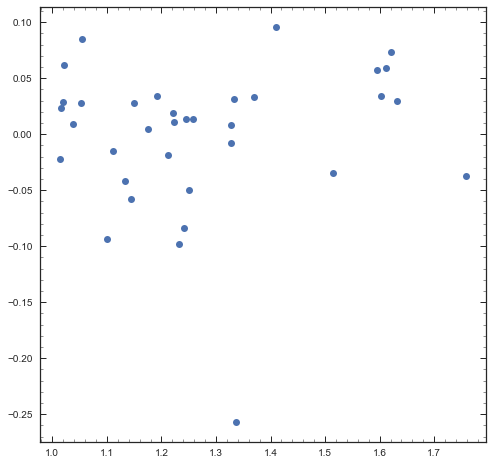

In [45]:
%matplotlib inline

plt.figure(figsize=[8,8])
plt.plot(galDB['hi_res_specz'],photz-galDB['hi_res_specz'],'o')